Downloading Data from Kaggle

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


Analyzing Training Data

In [6]:
import pandas as pd
from pandas import DataFrame
import numpy as np

train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Checking missing values

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Feature Analysis

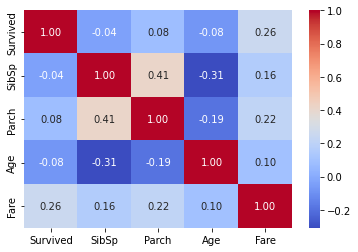

In [15]:
import seaborn as sns

g= sns.heatmap(train_data [["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), 
               annot=True, fmt = ".2f", cmap = "coolwarm")

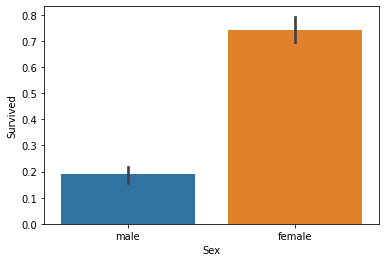

In [16]:
g1 = sns.barplot (x='Sex', y='Survived', data =train_data)
g1= g.set_ylabel("Survival Probability")

Handling Missing Values

In [17]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [18]:
train_data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [19]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [20]:
test_data['Age'].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [21]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Catagorical Values

In [23]:
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [24]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])

In [26]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

One Hot Coding for Catagorical Data

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [28]:
train_encode = train_data[['Sex', 'Ticket', 'Cabin', 'Embarked']].apply(enc.fit_transform)
train_encode

,Sex,Ticket,Cabin,Embarked
0,1,523,47,2
1,0,596,81,0
2,0,669,47,2
3,0,49,55,2
4,1,472,47,2
...,...,...,...,...
886,1,101,47,2
887,0,14,30,2
888,0,675,47,2
889,1,8,60,0


In [29]:
train_data[['Sex', 'Ticket', 'Cabin', 'Embarked']] = train_encode[['Sex', 'Ticket', 'Cabin', 'Embarked']]

train_data = train_data.drop('Name', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,47,2


In [30]:
test_encode = test_data[['Sex', 'Ticket', 'Cabin', 'Embarked']].apply(enc.fit_transform)
test_encode

,Sex,Ticket,Cabin,Embarked
0,1,152,15,1
1,0,221,15,2
2,1,73,15,1
3,1,147,15,2
4,0,138,15,2
...,...,...,...,...
413,1,267,15,2
414,0,324,22,0
415,1,346,15,2
416,1,220,15,2


In [31]:
test_data[['Sex', 'Ticket', 'Cabin', 'Embarked']] = test_encode[['Sex', 'Ticket', 'Cabin', 'Embarked']]

test_data = test_data.drop('Name', axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,15,1
1,893,3,0,47.0,1,0,221,7.0000,15,2
2,894,2,1,62.0,0,0,73,9.6875,15,1
3,895,3,1,27.0,0,0,147,8.6625,15,2
4,896,3,0,22.0,1,1,138,12.2875,15,2


Getting Data Ready for Training

In [32]:
train_data.shape

(891, 11)

In [33]:
test_data.shape

(418, 10)

In [34]:
Y_train = train_data['Survived']
X_train = train_data.drop(labels = 'Survived', axis=1)

In [35]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,0,38.0,1,0,596,71.2833,81,0
2,3,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,0,35.0,1,0,49,53.1000,55,2
4,5,3,1,35.0,0,0,472,8.0500,47,2


Data Normalization

In [36]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)
X_train -= X_train_min
X_train /= (X_train_max-X_train_min)

In [37]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,1.0,1.0,0.271174,0.125,0.0,0.769118,0.014151,0.321918,1.0
1,0.001124,0.0,0.0,0.472229,0.125,0.0,0.876471,0.139136,0.554795,0.0
2,0.002247,1.0,0.0,0.321438,0.000,0.0,0.983824,0.015469,0.321918,1.0
3,0.003371,0.0,0.0,0.434531,0.125,0.0,0.072059,0.103644,0.376712,1.0
4,0.004494,1.0,1.0,0.434531,0.000,0.0,0.694118,0.015713,0.321918,1.0


In [38]:
test_data_min = test_data.min(axis=0)
test_data_max = test_data.max(axis=0)
test_data -= test_data_min
test_data /= (test_data_max-test_data_min)

In [39]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Model Building

In [40]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
  return model

Model Training

In [41]:
from keras import models
from keras import layers

model = build_model()
history = model.fit(X_train, Y_train, epochs=200, batch_size=125)

Epoch 1/200
8/8 [==============================] - 1s 3ms/step - loss: 0.6345 - acc: 0.6162
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6082 - acc: 0.6162
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5930 - acc: 0.6195
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5772 - acc: 0.6431
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5559 - acc: 0.7374
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5362 - acc: 0.7699
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5238 - acc: 0.7789
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5107 - acc: 0.7710
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.5010 - acc: 0.7778
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4924 - acc: 0.7699
Epoch 11/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4858 

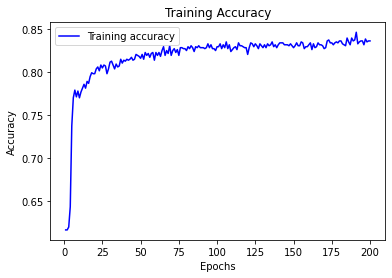

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
Score = model.evaluate(X_train, Y_train)
print('Score:''{:.2f}%'.format(Score[1]*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.3765 - acc: 0.8395
Score:83.95%


In [44]:
predictions = model.predict(test_data)

In [45]:
predictions_r = np.around(predictions)
predictions_rf = predictions_r.ravel()

In [46]:
test_data= test_data*(test_data_max-test_data_min)
test_data= test_data + test_data_min

In [47]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions_rf})

In [48]:
output = output.astype('int64')

In [49]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [50]:
output.to_csv('my_submission.csv', index=False)
print("Submission file was successfully saved!")

Submission file was successfully saved!
